* Pytorch에는 Transformer 모듈을 제공합니다. 이를 통해 기본적인 구조에 대해 이해해봅시다.

https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html

In [ ]:
import torch
from torch import nn

In [ ]:
from torchvision.models import vit_b_16, vit_b_32, vit_l_16, vit_h_14

# ViT-B/16 모델을 사전 학습된 가중치와 함께 불러오기
model = vit_b_16()

# 모델을 평가 모드로 설정
model.eval()

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model, (1,3,224,224))

Layer (type:depth-idx)                        Output Shape              Param #
VisionTransformer                             [1, 1000]                 768
├─Conv2d: 1-1                                 [1, 768, 14, 14]          590,592
├─Encoder: 1-2                                [1, 197, 768]             151,296
│    └─Dropout: 2-1                           [1, 197, 768]             --
│    └─Sequential: 2-2                        [1, 197, 768]             --
│    │    └─EncoderBlock: 3-1                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-2                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-3                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-4                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-5                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-6                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-7             

In [ ]:
from PIL import Image
image = Image.open('/content/drive/MyDrive/PD 2401/AI_gen.png')

In [ ]:
image

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from torchvision.transforms import Compose, Resize, ToTensor, Normalize

transform = Compose([
    Resize((224, 224)),
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
image_tensor = transform(image).unsqueeze(0).to('cuda')

In [ ]:
with torch.no_grad():
    outputs = model(image_tensor)

In [ ]:
outputs

tensor([[-3.3475e-01,  1.1355e-01, -5.5184e-01, -7.4278e-02,  3.9246e-01,
         -2.8883e-02, -6.5744e-01, -1.8038e-01, -3.2894e-01, -5.0281e-02,
         -4.8860e-01, -1.5333e-01, -1.0289e-01, -2.6277e-01,  1.6106e-02,
         -4.3373e-01,  3.0339e-01,  3.4340e-02, -2.1833e-01, -2.6877e-01,
          3.1612e-01, -3.7427e-01, -6.2889e-01,  1.7531e-01,  6.2648e-02,
          5.2589e-02, -1.6411e-01,  5.2365e-01,  4.3506e-02, -1.8148e-01,
          4.6871e-01,  6.8704e-03, -9.4915e-02, -1.9376e-01,  1.2627e-01,
         -7.7464e-02,  4.3715e-02, -3.0044e-01,  3.4812e-01, -2.5430e-01,
          1.2266e-01,  1.7505e-01,  3.1735e-01, -3.4472e-01, -1.3134e-01,
         -2.0038e-01, -1.0383e-01, -6.5521e-01, -2.5498e-01, -9.8146e-01,
         -1.2550e-01,  2.0911e-01,  7.7947e-02,  2.0393e-01,  2.2383e-01,
         -4.3768e-01, -1.2936e-02,  1.4384e-01, -1.3826e-01, -4.2265e-01,
         -1.1696e-01,  7.6983e-02, -5.1532e-01, -8.3797e-01,  3.5605e-01,
         -6.1846e-01, -7.6933e-01,  3.

In [ ]:
outputs.shape

torch.Size([1, 1000])

In [ ]:
outputs.argmax(1)

tensor([903], device='cuda:0')

903번은 wig 가발


In [ ]:
import matplotlib.pyplot as plt

# 특정 레이어의 출력을 추출하기 위한 forward hook 등록
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach().to('cpu')
    return hook

# 모든 인코더 레이어에 후크 추가
for i, layer in enumerate(model.encoder.layers):
    layer.register_forward_hook(get_activation(f'encoder_layer_{i}'))

# 모델을 통해 이미지 전달
output = model(image_tensor)



In [ ]:
activation

{'encoder_layer_0': tensor([[[-0.0140, -0.3315, -0.0609,  ...,  0.0527, -0.1336, -0.0958],
          [-0.1728, -0.0050, -0.1534,  ..., -0.0688,  0.0805, -0.1790],
          [-0.1370,  0.0520,  0.0191,  ..., -0.0866,  0.0959, -0.1760],
          ...,
          [ 0.0518, -0.6077, -0.0850,  ..., -0.2035, -0.3213,  1.5423],
          [-0.0225, -0.5193, -0.1737,  ..., -0.0402,  1.1100, -0.3671],
          [-0.1331, -0.5407, -0.1687,  ...,  0.0948,  0.3629,  0.0876]]]),
 'encoder_layer_1': tensor([[[-0.0132, -0.2690, -0.0318,  ...,  0.0497, -0.1280, -0.0707],
          [-0.2104,  0.1861, -0.3403,  ..., -0.0409,  0.1119,  0.0122],
          [-0.1417,  0.2867, -0.0646,  ..., -0.1110,  0.0653,  0.0266],
          ...,
          [ 0.1899, -0.6257, -0.0603,  ...,  0.3988,  0.4069,  0.7906],
          [-0.0735, -0.5463,  0.0350,  ..., -0.2190,  1.0847, -0.1560],
          [-0.1754, -0.5868, -0.5243,  ..., -0.2457,  0.3148,  0.1313]]]),
 'encoder_layer_2': tensor([[[-1.2805e-02, -1.8969e-01, -2.297

In [ ]:
activation['encoder_layer_0'].shape

torch.Size([1, 197, 768])

In [ ]:
activation['encoder_layer_10'].shape

torch.Size([1, 197, 768])

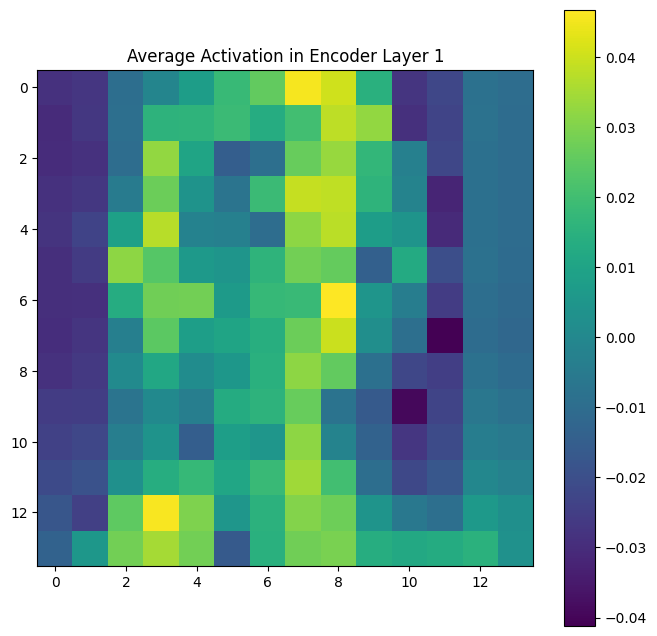

In [ ]:
def plot_patches_from_layer(activation, layer_index):
    # 클래스 토큰 제외
    patch_data = activation[f'encoder_layer_{layer_index}'][0, 1:, :]

    # 각 토큰의 특징 벡터 평균을 계산
    patch_avg = patch_data.mean(dim=1).view(14, 14).cpu().numpy()

    plt.figure(figsize=(8, 8))
    plt.imshow(patch_avg, cmap='viridis')
    plt.colorbar()
    plt.title(f'Average Activation in Encoder Layer {layer_index + 1}')
    plt.show()

# 예를 들어 첫 번째 인코더 레이어의 출력 시각화
plot_patches_from_layer(activation, 0)

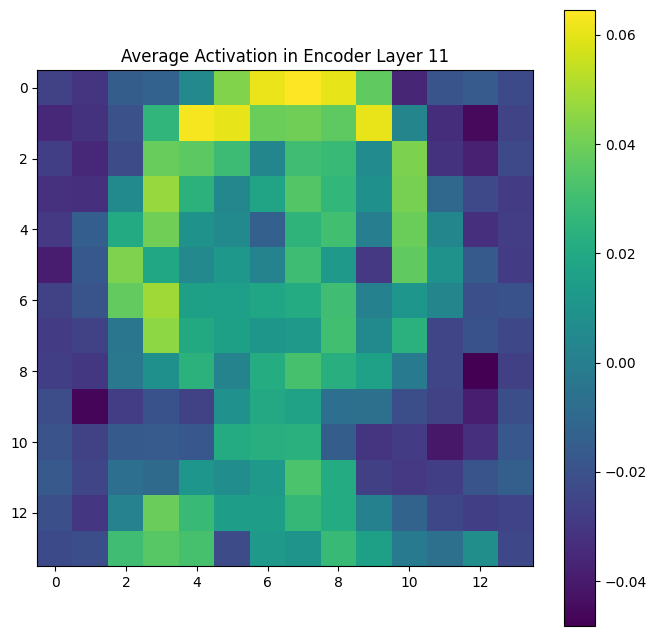

In [ ]:
plot_patches_from_layer(activation, 10)

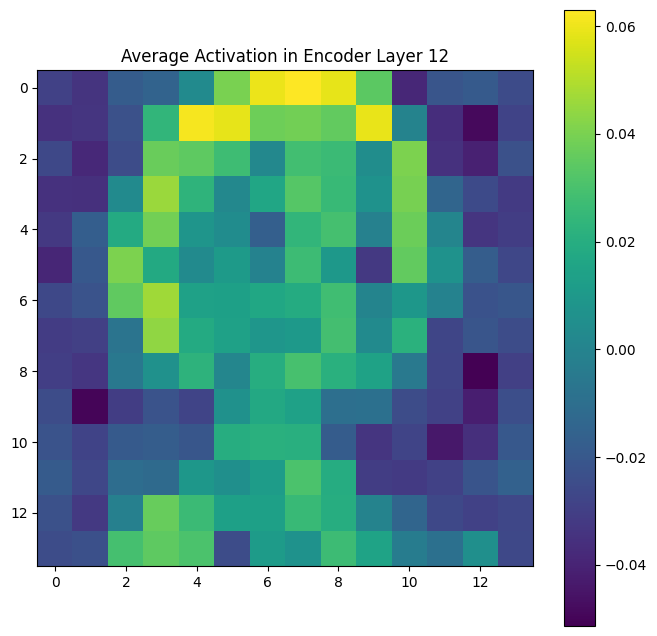

In [ ]:
plot_patches_from_layer(activation, 11)